In [41]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [111]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path_test)

print("가위 이미지 resize 완료!")

744  images to be resized.
744  images resized.
가위 이미지 resize 완료!


In [112]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path_test)

print("바위 이미지 resize 완료!")
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

744  images to be resized.
744  images resized.
바위 이미지 resize 완료!


In [113]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path_test)

print("보자기 이미지 resize 완료!")

752  images to be resized.
752  images resized.
보자기 이미지 resize 완료!


In [115]:
import numpy as np
import os

import numpy as np

def load_data(img_path, number_of_data=2252):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path_test)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 2252 입니다.
x_test shape: (2252, 28, 28, 3)
y_test shape: (2252,)


In [118]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

#그만 좀 바뀌어라
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Model에 추가된 Layer 개수:  7
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_45 (Dense)             

In [75]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.9843 - accuracy: 0.3049
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2051 - accuracy: 0.3803
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.8590
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.9115
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9279
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9738
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9902
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9869
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9934
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9967


In [119]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

102  images to be resized.
102  images resized.
가위 이미지 resize 완료!


In [120]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [121]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보자기 이미지 resize 완료!")

102  images to be resized.
102  images resized.
보자기 이미지 resize 완료!


In [139]:
import numpy as np

def load_data(img_path, number_of_data=305):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 305 입니다.
x_train shape: (305, 28, 28, 3)
y_train shape: (305,)


In [125]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

#그만 좀 바뀌어라
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Model에 추가된 Layer 개수:  7
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_47 (Dense)             

In [140]:
predicted_result = model.predict(x_train_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_train[idx])

model.predict() 결과 :  [0.09426099 0.09527298 0.12146033 0.13580403 0.10292319 0.09688807
 0.11328096 0.09596927 0.07379744 0.07034278]
model이 추론한 가장 가능성이 높은 결과 :  3
실제 데이터의 라벨 :  0


예측확률분포: [0.09398372 0.09279337 0.09647449 0.10236338 0.10122462 0.09517467
 0.1129072  0.09381937 0.11468548 0.09657368]
라벨: 0, 예측결과: 8


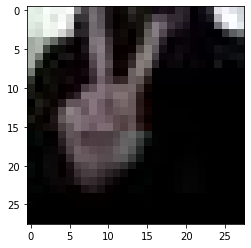

예측확률분포: [0.09598302 0.09620126 0.09014158 0.0974438  0.09988407 0.10016923
 0.1099823  0.10439503 0.10804354 0.09775612]
라벨: 2, 예측결과: 6


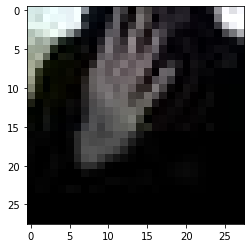

예측확률분포: [0.09720603 0.0915091  0.08994648 0.10074487 0.10076287 0.09700339
 0.11475185 0.09812415 0.11413988 0.09581131]
라벨: 0, 예측결과: 6


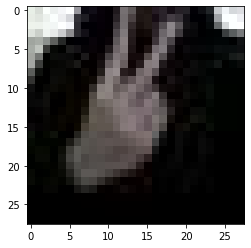

예측확률분포: [0.09692785 0.09768227 0.09267326 0.10252722 0.09807079 0.09643683
 0.10768448 0.09743349 0.11017226 0.10039154]
라벨: 1, 예측결과: 8


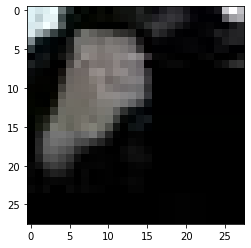

예측확률분포: [0.09720603 0.0915091  0.08994648 0.10074487 0.10076287 0.09700339
 0.11475185 0.09812415 0.11413988 0.09581131]
라벨: 0, 예측결과: 6


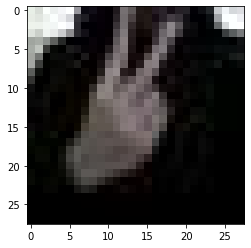

In [136]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_train[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_train[n], cmap=plt.cm.binary)
    plt.show()

In [141]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [143]:
test_loss, test_accuracy = model.evaluate(x_train_reshaped, y_train, verbose=2)
print("train_loss: {} ".format(test_loss))
print("train_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.2765 - accuracy: 0.2885
train_loss: 2.2764739990234375 
train_accuracy: 0.2885245978832245
